In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import scipy as sp

# Useful Discrete Distributions


## Bernoulli + Binomial

<Axes: ylabel='Count'>

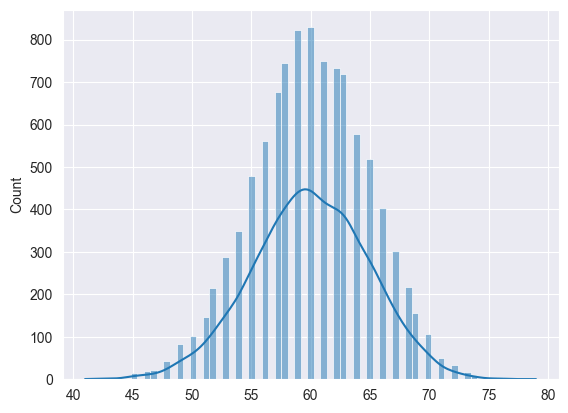

In [6]:
bernoulli_data = np.random.binomial(n=100, p=0.6, size=10000)

sns.histplot(bernoulli_data, kde=True)

## Poisson

<Axes: ylabel='Count'>

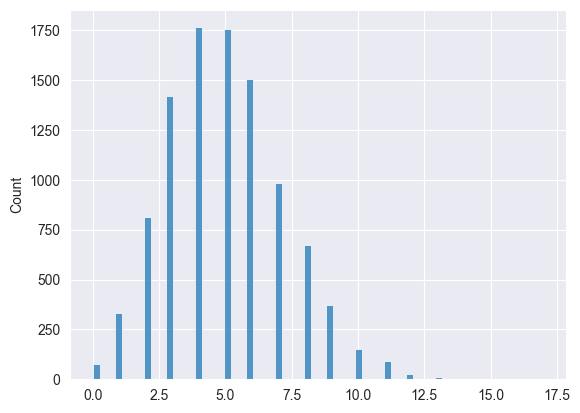

In [9]:
# Define the mean (λ) of the Poisson distribution
lambda_ = 5  # For example, let's use 5 as the mean

# Generate Poisson-distributed data of size 10,000
poisson_data = np.random.poisson(lambda_, 10000)

sns.histplot(poisson_data)


## Discrete Uniform

<Axes: ylabel='Count'>

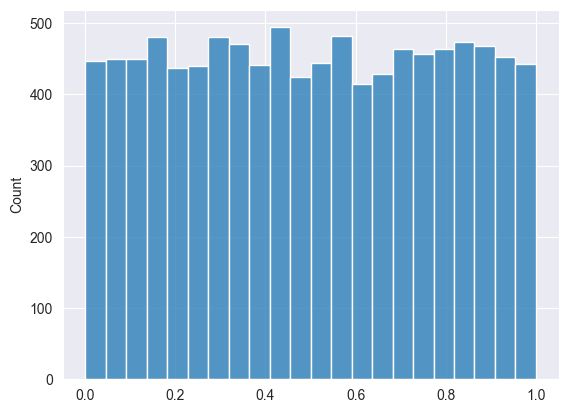

In [10]:
uniform_data = np.random.uniform(0, 1, size=10000)

sns.histplot(uniform_data)


## Exponential distribution

<Axes: ylabel='Count'>

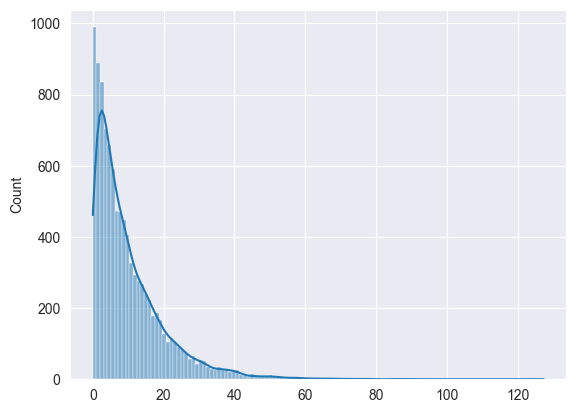

In [12]:
exponential_dist = np.random.exponential(scale=10, size=10000)
sns.histplot(exponential_dist, kde=True)

## Normal

<Axes: ylabel='Count'>

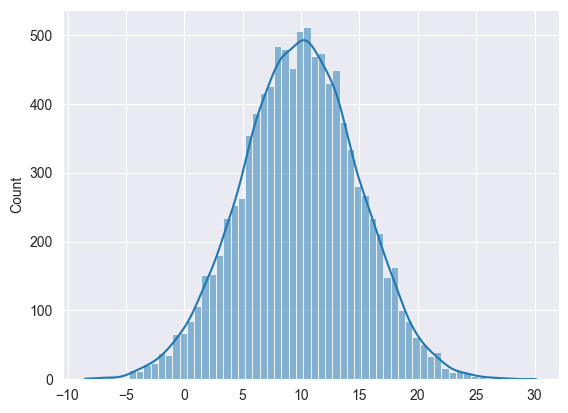

In [19]:
normal_data = np.random.normal(loc=10, scale=5, size=10000)
sns.histplot(normal_data, kde=True)

## Sampling

### Inverse transform sampling

<Axes: ylabel='Count'>

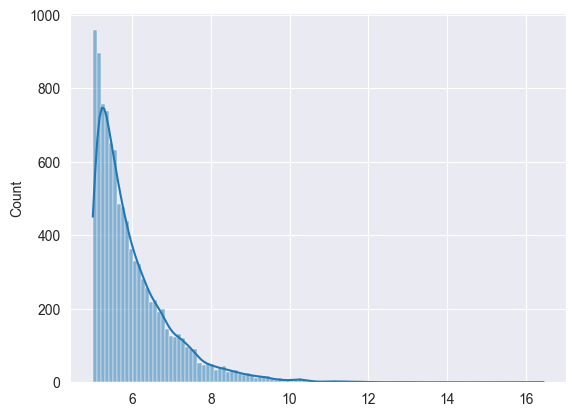

In [32]:
def inverse_transform_sampling(desired_distribution_CDF, n=10000):
    uniform_samples = np.random.uniform(0, 1, n)
    samples_generated = desired_distribution_CDF.ppf(uniform_data)
    
    return samples_generated
    

generated_data = inverse_transform_sampling(sp.stats.expon(loc=5))
sns.histplot(generated_data, kde=True)

### Box-Muller Transformation


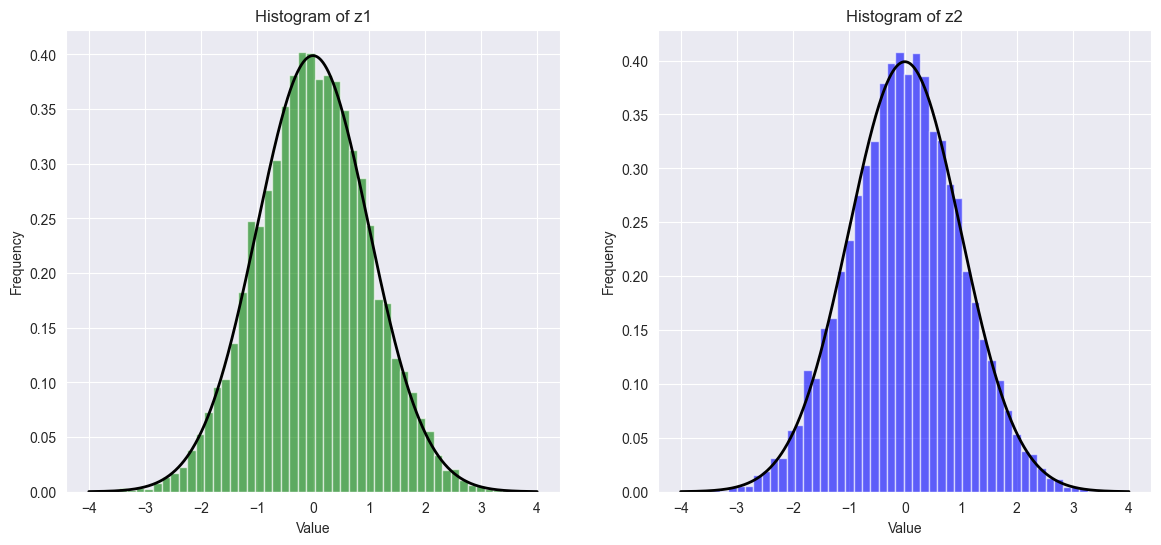

In [33]:
def box_muller(n=10000):
    u1 = np.random.uniform(0, 1, size=n)
    u2 = np.random.uniform(0, 1, size=n)
    z1 = np.sqrt(-2  * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2  * np.log(u1)) * np.sin(2 * np.pi * u2)
    
    return z1, z2


# Generate samples using Box-Muller transformation
z1, z2 = box_muller()

# Plot the histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot z1
ax1.hist(z1, bins=50, density=True, alpha=0.6, color='g')
ax1.set_title('Histogram of z1')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

# Plot z2
ax2.hist(z2, bins=50, density=True, alpha=0.6, color='b')
ax2.set_title('Histogram of z2')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

# Plot theoretical normal distribution for comparison
x = np.linspace(-4, 4, 1000)
p = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

ax1.plot(x, p, 'k', linewidth=2)
ax2.plot(x, p, 'k', linewidth=2)

plt.show()


### Acceptance – Rejection Technique

<Axes: ylabel='Count'>

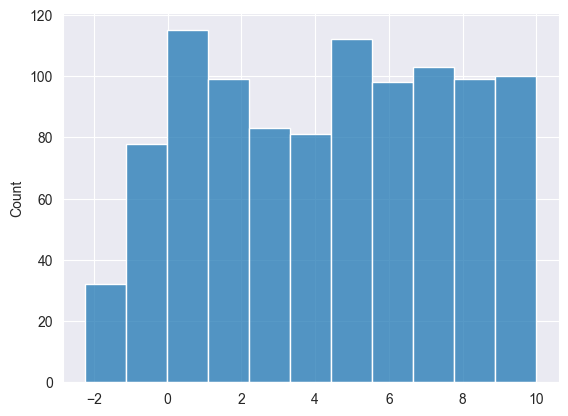

In [62]:
def f(x):
    return x*2  + 5

def DFx(x):
    return 2 * x
def find_min(f_x):
    min_val = np.random.randn()
    for iteration in range(1000):
        min_val = min_val - 0.01 * DFx(min_val)
    return min_val
    
def acceptance_rejection_method(f_x, n=1000):
    c = f((find_min(f_x)))
    generated_values = []
    while len(generated_values) < n:
        x = np.random.uniform(-10, 10)
        y = np.random.uniform(0, c)
        if y <= f(x):
            generated_values.append(x)
    
    return generated_values

x = np.linspace(-10, 10, num=10000)
f_x = f(x)
# plt.plot(f_x)
generated_data = acceptance_rejection_method(f_x)
sns.histplot(generated_data)